Plot data downloaded by the `scripts/poll_PV_Live_API.py` script.

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pathlib import Path
import numpy as np
import re
from datetime import datetime, timedelta
import pytz
from typing import Final

In [2]:
DATA_PATH: Path = Path("/home/jack/data/PV/PV_Live/poll_API_every_15_minutes/")

In [3]:
def extract_datetime_from_filename(filename: str) -> datetime:
    pattern = r"(\d{4}-\d{2}-\d{2}T\d{2}:\d{2}:\d{2})Z"
    match = re.search(pattern, filename)
    
    if match:
        date_time_str = match.group(1)
        return pytz.UTC.localize(datetime.strptime(date_time_str, "%Y-%m-%dT%H:%M:%S"))
    else:
        raise ValueError("Invalid filename format")

In [4]:
def load_data_from_parquet_file(filename: Path) -> pd.DataFrame:
    df = pd.read_parquet(filename).astype({"generation_mw": np.float32})
    dt_polled = extract_datetime_from_filename(filename.name)
    df["dt_polled"] = dt_polled
    return df

def load_all_data_from_parquet_files(data_path: Path) -> pd.DataFrame:
    dfs = []
    for filename in data_path.glob("*.parquet"):
        df = load_data_from_parquet_file(filename)
        dfs.append(df)
    return pd.concat(dfs).sort_index()

In [5]:
df = load_all_data_from_parquet_files(DATA_PATH)

In [6]:
df_national = df.loc[(slice(None), 0), :].drop(columns="updated_gmt")
df_national

generation_mw                 dt_polled
datetime_gmt              gsp_id                                         
2023-04-28 00:00:00+00:00 0            0.000000 2023-05-08 10:45:02+00:00
                          0            0.000000 2023-05-07 03:00:01+00:00
                          0            0.000000 2023-05-03 17:00:02+00:00
                          0            0.000000 2023-05-08 12:15:02+00:00
                          0            0.000000 2023-05-08 12:00:02+00:00
...                                         ...                       ...
2023-05-09 11:30:00+00:00 0         4539.479980 2023-05-09 11:45:02+00:00
2023-05-09 12:00:00+00:00 0         4631.000000 2023-05-09 12:30:02+00:00
                          0         4592.899902 2023-05-09 12:15:02+00:00
                          0         4651.390137 2023-05-09 12:45:02+00:00
2023-05-09 12:30:00+00:00 0         4860.129883 2023-05-09 12:45:02+00:00

[254784 rows x 2 columns]

In [7]:
df_national_pivoted = (
    df_national.pivot_table(
        values="generation_mw",
        index="datetime_gmt",
        columns="dt_polled",
    )
    .resample("15T", axis="columns")
    .mean()
    .resample("30T")
    .mean()
    )
df_national_pivoted

dt_polled,2023-05-02 17:00:00+00:00,2023-05-02 17:15:00+00:00,2023-05-02 17:30:00+00:00,2023-05-02 17:45:00+00:00,2023-05-02 18:00:00+00:00,2023-05-02 18:15:00+00:00,2023-05-02 18:30:00+00:00,2023-05-02 18:45:00+00:00,2023-05-02 19:00:00+00:00,2023-05-02 19:15:00+00:00,...,2023-05-09 10:30:00+00:00,2023-05-09 10:45:00+00:00,2023-05-09 11:00:00+00:00,2023-05-09 11:15:00+00:00,2023-05-09 11:30:00+00:00,2023-05-09 11:45:00+00:00,2023-05-09 12:00:00+00:00,2023-05-09 12:15:00+00:00,2023-05-09 12:30:00+00:00,2023-05-09 12:45:00+00:00
datetime_gmt,,,,,,,,,,,,,,,,,,,,,
2023-04-28 00:00:00+00:00,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
2023-04-28 00:30:00+00:00,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
2023-04-28 01:00:00+00:00,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
2023-04-28 01:30:00+00:00,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
2023-04-28 02:00:00+00:00,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-09 10:30:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3920.179932,3978.47998,4000.260010,4000.26001,4154.319824,4154.319824,4152.529785,4152.529785,4153.520020
2023-05-09 11:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4178.430176,4234.52002,4266.740234,4266.740234,4295.390137,4295.390137,4300.109863
2023-05-09 11:30:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4539.479980,4578.950195,4588.830078,4588.830078,4602.669922


In [8]:
img = (
    df_national_pivoted
    .fillna(-1)
    .diff(axis="columns")
    .astype(bool)
    .loc["2023-05-02":]
    .iloc[:, 7:]  # Remove visually confusing black bar at far left.
)


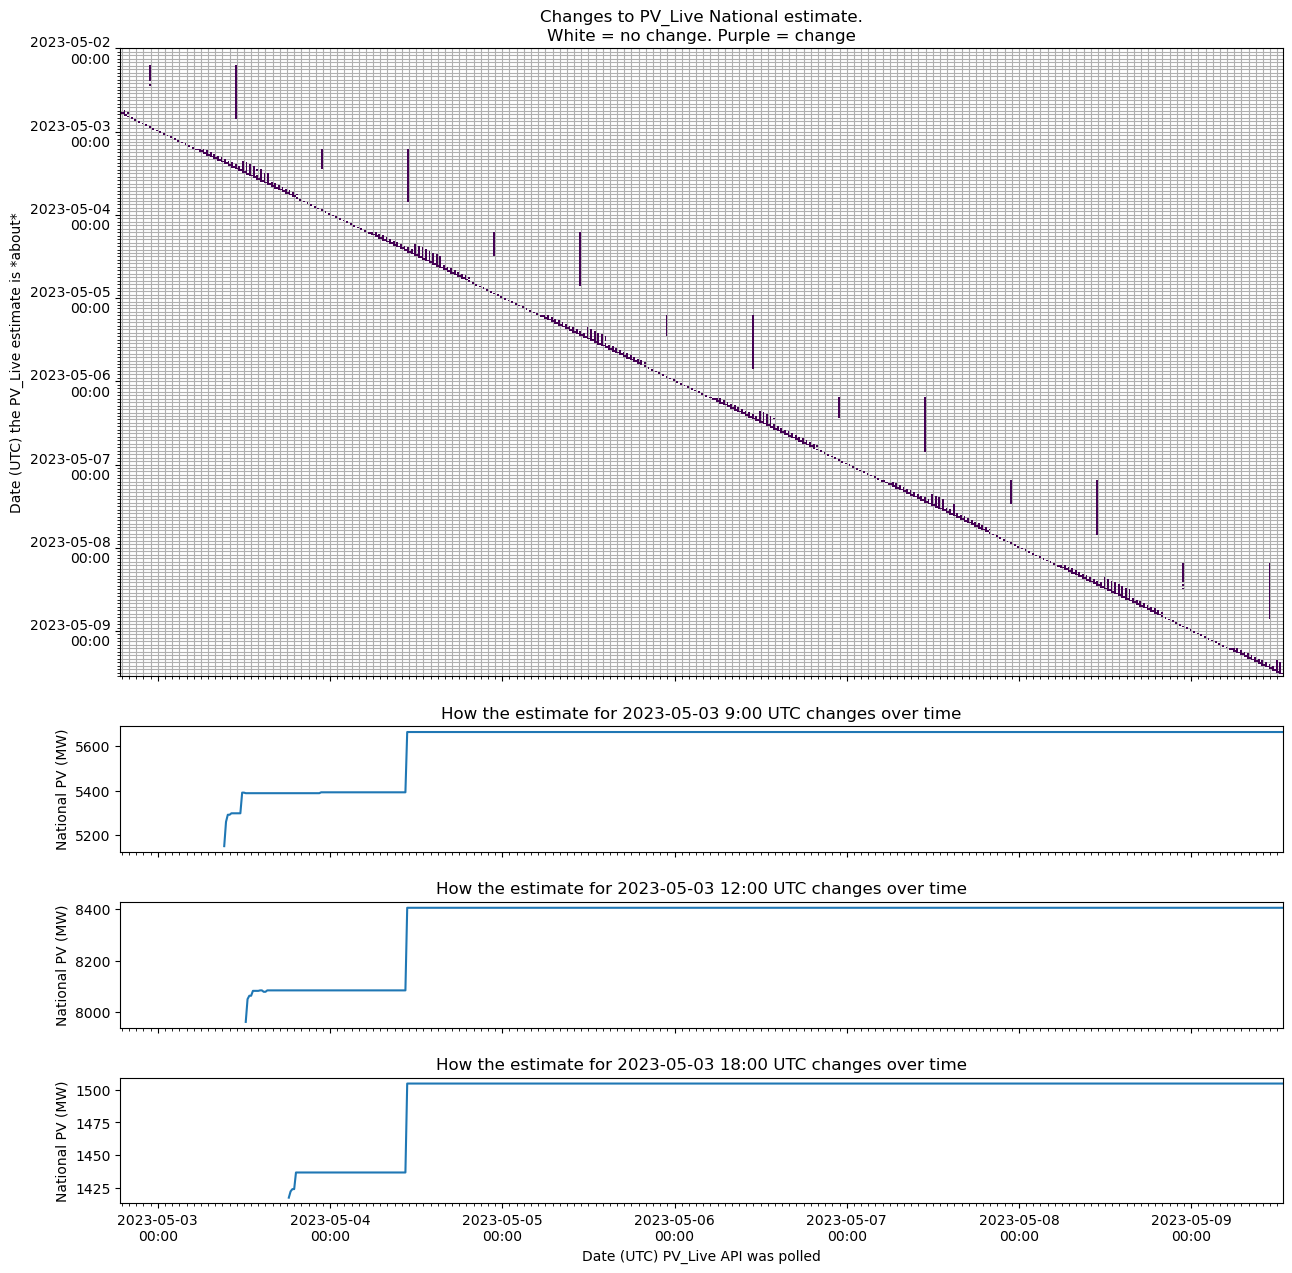

In [11]:
ANNOTATE: Final[bool] = False
PLOT_ONE_WEEK: Final[bool] = True

fig, axes = plt.subplots(
    nrows=4, 
    sharex=True, 
    figsize=(15, 15), 
    gridspec_kw={'height_ratios':[5, 1, 1, 1]},
)

ax = axes[0]
ax.imshow(
    np.where(img.values == 0, np.nan, img.values),  # Make the "white" values transparent.
    aspect="auto",
    interpolation="none",
    extent=(  # left, right, bottom, top
        img.columns[0], 
        img.columns[-1] + timedelta(minutes=15), 
        img.index[-1] + timedelta(minutes=30), 
        img.index[0]
    ),
    zorder=1,
    )
ax.set_title("Changes to PV_Live National estimate.\nWhite = no change. Purple = change")
axes[-1].set_xlabel("Date (UTC) PV_Live API was polled")
ax.set_ylabel("Date (UTC) the PV_Live estimate is *about*")
ax.set_axisbelow(True)
ax.grid(axis="both", which="both")
ax.set_xlim((img.columns[0], img.columns[-1]))

for axis in [ax.xaxis, ax.yaxis]:
    axis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d\n%H:%M"))
    axis.set_major_locator(
        mdates.HourLocator(byhour=range(0, 24, 24 if PLOT_ONE_WEEK else 6)))
    
ax.yaxis.set_minor_locator(
    mdates.MinuteLocator(byminute=0 if PLOT_ONE_WEEK else [0, 30]))
ax.xaxis.set_minor_locator(mdates.MinuteLocator(byminute=0 if PLOT_ONE_WEEK else [0, 15, 30, 45]))

ANNOTATION_KWARGS = dict(
    arrowprops=dict(arrowstyle="->", color="black"),
    bbox=dict(facecolor="white"),
)

if ANNOTATE:
    ax.annotate(
        "Initial estimate for 05:00 UTC\n(this estimate will be updated at 23:00 UTC\nand the following day at 11:00 UTC)",
        xy=(datetime(2023, 5, 3, 5, 00), datetime(2023, 5, 3, 4, 30)),
        xytext=(datetime(2023, 5, 3, 4, 0), datetime(2023, 5, 3, 2, 0)),
        **ANNOTATION_KWARGS,
    )

    ax.annotate(
        "Estimates for daylight hours are updated multiple times\n within the first 3 hours of the estimate.",
        xy=(datetime(2023, 5, 3, 8, 00), datetime(2023, 5, 3, 12, 00)),
        xytext=(datetime(2023, 5, 2, 21, 0), datetime(2023, 5, 3, 17, 0)),
        **ANNOTATION_KWARGS,
    )

    ax.annotate(
        "Estimates for 05:00 to 11:00 UTC\nupdated at 23:00 UTC\n(the same day)",
        xy=(datetime(2023, 5, 3, 23, 00), datetime(2023, 5, 3, 5, 0)),
        xytext=(datetime(2023, 5, 3, 20, 0), datetime(2023, 5, 3, 2, 0)),
        **ANNOTATION_KWARGS,
    )

    ax.annotate(
        "Estimates for 05:00 to 21:00 UTC\nupdated at 11:00 UTC\n(the following day)",
        xy=(datetime(2023, 5, 4, 11, 00), datetime(2023, 5, 3, 5, 0)),
        xytext=(datetime(2023, 5, 4, 6, 0), datetime(2023, 5, 3, 2, 0)),
        **ANNOTATION_KWARGS,
    )


# Plot timeseries
def plot_timeseries(ax, date):
    ax.plot(df_national_pivoted.loc[date])
    ax.set_title(f"How the estimate for {date} UTC changes over time")
    ax.set_ylabel("National PV (MW)")
    

plot_timeseries(axes[1], "2023-05-03 9:00")
plot_timeseries(axes[2], "2023-05-03 12:00")
plot_timeseries(axes[3], "2023-05-03 18:00")

if ANNOTATE:
    axes[1].annotate(
        "Initial estimate of\n5150 MW at 9:00",
        xy=(datetime(2023, 5, 3, 9, 00), 5150),
        xytext=(datetime(2023, 5, 3, 0, 00), 5400),
        **ANNOTATION_KWARGS,
    )
    
    axes[1].annotate(
        "Multiple updates within the first 3 hours\nof the initial estimate",
        xy=(datetime(2023, 5, 3, 10, 00), 5300),
        xytext=(datetime(2023, 5, 3, 8, 00), 5500),
        **ANNOTATION_KWARGS,
    )
    
    axes[1].annotate(
        "*Tiny* update at 23:00 UTC",
        xy=(datetime(2023, 5, 3, 23, 00), 5375),
        xytext=(datetime(2023, 5, 3, 18, 00), 5200),
        **ANNOTATION_KWARGS,
    )
    
    axes[1].annotate(
        "Large update at 11:00 UTC",
        xy=(datetime(2023, 5, 4, 11, 00), 5600),
        xytext=(datetime(2023, 5, 4, 8, 00), 5200),
        **ANNOTATION_KWARGS,
    )
    